# Terminology / Notation

$H_0$ - Null Hypothesis "nothing interesting happening"

$H_a$ - Alternative hypothesis 

 - Results: Reject H₀ or Fail to reject H₀
 
µₜₕ - theoretical mean

µ(obs) - observed mean 
 
1 tail > <br>
2 tail ≠ <br>
1 tail <
 
 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import env
np.random.seed(123)

In [7]:
# Define a roll [1,2,3,4,5,6]

# Set a sample of 10
n_dice_per_experiment = ncols = 10
n_experiments = nrows = 100

# 100 rows and 10 columns
data = np.random.randint(1, 7, (nrows, ncols))


# view some of the outcomes
data[:4]

array([[5, 6, 1, 2, 3, 2, 2, 1, 2, 4],
       [1, 5, 5, 3, 4, 1, 4, 6, 1, 5],
       [2, 4, 3, 4, 1, 5, 6, 3, 3, 3],
       [4, 6, 4, 1, 2, 3, 3, 2, 5, 4]])

In [3]:
# Take the mean of each row
calculated_averages = data.mean(axis=1)
calculated_averages


array([3.4, 2.5, 3.5, 3.7, 3.2, 4.7, 3.4, 3.2, 3.4, 3. , 3.7, 3.5, 4. ,
       4.5, 2.9, 2.8, 2.9, 3.8, 3.2, 3.6, 3.4, 4. , 3.5, 3.3, 3.6, 3. ,
       4.3, 3. , 3.3, 3.2, 4.2, 3.9, 3.2, 3.8, 3.6, 3.4, 2.7, 3.4, 3.2,
       3.1, 3.2, 3. , 4.1, 3.3, 3. , 4.1, 3.4, 3.3, 2.9, 3.8, 3.4, 3.6,
       3.9, 3.2, 4.7, 3.8, 3.5, 2.8, 3.8, 4.7, 4.1, 3.5, 2.8, 3.7, 3.4,
       3.7, 3.6, 4.1, 3.6, 3.5, 2.9, 4. , 3.2, 3.4, 4.4, 2.9, 3.2, 3.9,
       1.9, 3. , 3. , 3.5, 3.3, 4.4, 3.4, 4.2, 4.1, 3.2, 3.5, 3.5, 3.8,
       3.1, 3.6, 2.9, 2.9, 4. , 3.3, 3.1, 3.4, 3.6])

Text(0.5, 1.0, 'Outcome of averaging 10 dice rolls 100 times')

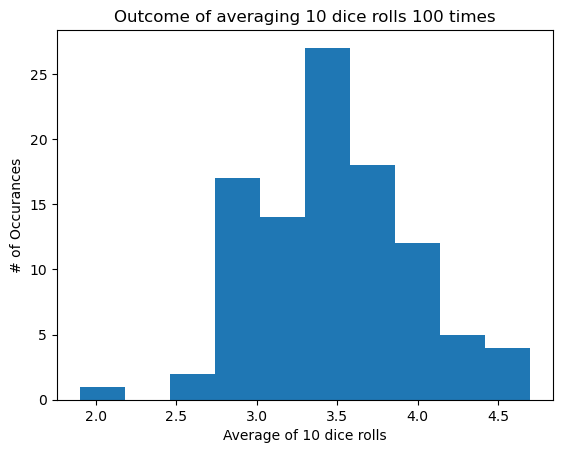

In [9]:
plt.hist(calculated_averages)

plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')
plt.ylabel('# of Occurances')

plt.title(f'Outcome of averaging {n_dice_per_experiment} dice rolls {n_experiments} times')


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import env

db_url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/telco_churn'
df = pd.read_sql('SELECT * FROM customers', db_url)  


In [14]:
# View the columns
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

<AxesSubplot:>

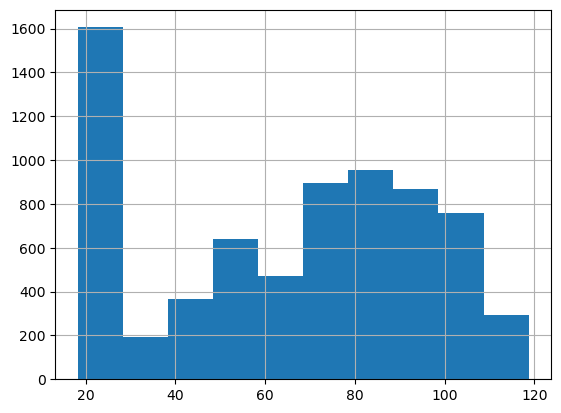

In [15]:
# Plot a histogram
df.monthly_charges.hist()

<AxesSubplot:>

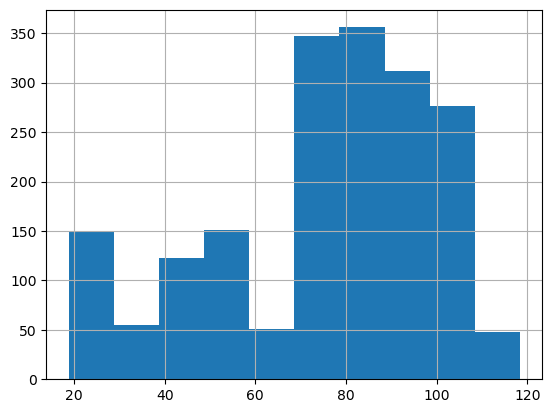

In [17]:
# Filter for a sample who churn 
churn_sample = df[df.churn == 'Yes'].monthly_charges

# Create a histogram
churn_sample.hist()


# Set hypothesis

H₀: Mean od monthly charges of churned customers <= Mean of monthly of all customers <br>
Hₐ:Mean of monthly chares of chrned customers > Mean of monthly charges of all customers

# Set an alpha value

In [28]:
𝜶 = 0.05

# Verify an assumption of sample size 

In [21]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [ ]:
# Compute Test Statistic

In [45]:
stats.ttest_1samp(churn_sample, overall_mean)

Ttest_1sampResult(statistic=-8.089051007850028, pvalue=7.428865797478264e-16)

In [46]:
# Churned customer sample
churn_sample = df[df.churn == 'Yes'].monthly_charges

# the overall mean 
overall_mean = df.monthly_charges.mean()

# The output of a 1 tail, 1 sample, t-test
# Specified the sample (churn_sample)
# Specified the overall_mean

# stats.ttest_1samp(churn_sample, overall_mean)

# Assign the output to t (for the t-statistic) and p (p-value)
t, p = stats.ttest_1samp(churn_sample, overall_mean)

# 1 tail since we are looking at a mean that is greater than the overall customer mean 
print(t, p/2, 𝜶)

16.96540308050567 1.8703196496911995e-60 0.05


Look at the t-statistic<br>
Is t > 0

Look at the p/2<br> 
Is p/2 < 𝜶

In [47]:
# The results based on t-statistic and the p-value

if p/2 > 𝜶:
    print("We fail to reject H₀")
elif t < 0:
    print("We fail to reject H₀")
else:
    print("We reject H₀")


We reject H₀


# Example 2

$H_0$: Mean of monthly charges of churned customers = Mean of monthly charges of all customers<br>
$H_a$: Mean of monthly charges of churned customers ≠ Mean of monthly charges of all customers

In [48]:
# Set up the test
# # Compute t Statistic and p-value

t, p = stats.ttest_1samp(churn_sample, overall_mean)

# output the assigned values
t, p, 𝜶

(16.96540308050567, 3.740639299382399e-60, 0.05)

In [49]:
# Compare the calculated p-value to alpha

p < 𝜶

True

In [50]:
if p < 𝜶:
    print("We reject the H₀")
else:
    print("We fail to reject the H₀")

We reject the H₀


# Example 3

## The monthly charge for the customers who churn is less than the mean of all customers

$H_0$: Monthly charges for customers who churn >= monthly charge for all customers <br>
$H_a$: Monthly charges for customers who churn < monthly charge for all customers


### Is this 1 tailed or 2 tailed?

1-tail: comparison is strictly less than

In [51]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)

t, p

(16.96540308050567, 3.740639299382399e-60)

In [52]:
# is p/2 less than alpha

print(p/2 < 𝜶)

# is t < 0

print(t < 0)

True
False


In [54]:
if (p/2 < 𝜶) & (t < 0):
    print("We reject the H₀")
else:
    print("We fail to reject the H₀")

We fail to reject the H₀


### Independent t-test (aka Two Sample t-test)

Goal: Compare the mean of some Group A to that of Group B

Group A - Customer who churn <br>
Group B - Customer who did not churn 

Verify assumptions:

 - Check that we have at least 30 observations
 - Independence
 - Equal variance
      - True -> equal     
      - False -> not equal

In [55]:
𝜶 = 0.05 

<AxesSubplot:>

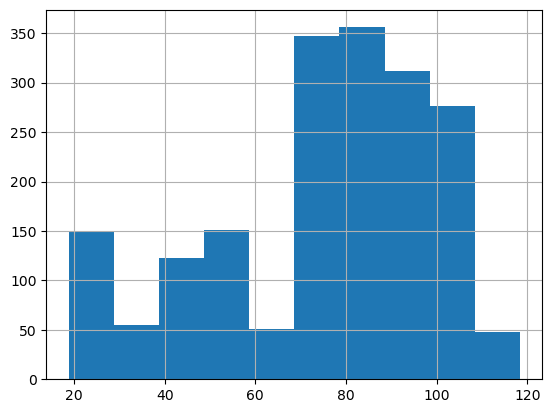

In [40]:
# Customers who churn
churn_sample = df[df.churn == 'Yes'].monthly_charges

churn_sample.hist()


<AxesSubplot:>

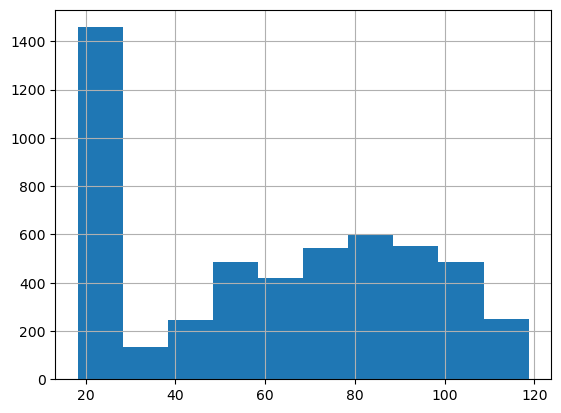

In [56]:
# Customers who did not churn
no_churn_sample = df[df.churn == 'No'].monthly_charges

no_churn_sample.hist()

In [67]:
# Alpha is set
𝜶 = 0.05 

# Find the variance of churned customers 
print(churn_sample.var())

# Find the variance of churned customers who do not churn 
print(no_churn_sample.var())

#Therefore we will use equal_var = False


608.4141833954315
966.7527670734293


In [95]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)
t, p / 2


(18.407526676414673, 4.296224665773525e-73)

In [73]:
print("is p/2 < alpha? ", p / 2 < 𝜶)
print("is t > 0? ", t > 0)


is p/2 < alpha?  True
is t > 0?  True


In [94]:
if p / 2 < 𝜶:
    print("We fail to reject H₀")
elif t > 0:
    print("We fail to reject H₀")
else:
    print("We reject 𝐻₀")


We fail to reject H₀


# Customers who churn are charged more than customers who do not churn 

## Set Hypothesis

$H_0$: Group who churn <= Group who do not churn<br>
$H_a$: Monthly charges of group who churn >  Monthly charges of grup who do not churn


$H_0$: Monthly charges are in fact equal <br>
$H_a$: Monthly charges for churned and not churned are not equal 

Two-tailed
 - compare p to 𝜶

In [77]:
# the test
# equal variance
# churn vs no-churn

t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

t, p


(18.407526676414673, 8.59244933154705e-73)

In [79]:
# if p < 𝜶 we reject the null

p < 𝜶
print("Reject H₀? ", p < 𝜶)


Reject H₀?  True


In [84]:
if p  < 𝜶:
    print("We fail to reject H₀")
else:
    print("We reject 𝐻₀")


We fail to reject H₀


## Example 3

### Are charges of customers who churn significantly less than those who do not churn?

$H_0$: Mean for churned customers is greater than or equal to the mean for customers who did not churn
<br>
$H_a$: Mean for churned customers is less than the mean for customers who did not churn


In [80]:
# 1 tail (less than comparison)
# Compare 𝜶 to p/2

t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

t, p

#two conditions 
 # p/2 < 𝜶
 # t < 0 

(18.407526676414673, 8.59244933154705e-73)

In [81]:
# is t-statistic < 0
print("Is t < 0? ", t < 0)

# is p/2 < 𝜶
print("is p/2 < 𝜶? ", p / 2 < 𝜶 )


Is t < 0?  False
is p/2 < 𝜶?  True


In [82]:
if p / 2 < 𝜶:
    print("We fail to reject H₀")
elif t < 0:
    print("We fail to reject H₀")
else:
    print("We reject 𝐻₀")


We fail to reject H₀


## ANOVA - analysis of variance

Outcome: compare means of groups A, B, and C

1. Plot distributions
2. Establish hypothesis

## Format of Hypothesis

$H_0$: Null hypothesis- $\mu_{A} = \mu{B} = \mu{C}$ <br>
$H_a$: Alternative Hypothesis- $\mu_{A} \neq \mu{B} \neq \mu{C}$

## Syntax fot test
 
 scipy.stats.f_oneway
 
Return: test statistics and a p-value 

In [87]:
# Load a dataset

df = sns.load_dataset('iris')

# check the sample size 

df.species.value_counts()

#df.info()

# Independent - Belong to one species
# Sample size - sufficient


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
# Group A - setosa
# Group B - versicolor
# Group C - virginica


In [88]:
# statistical summary of sepal_length

df.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [89]:
# Filter sepal_length by species

versicolor_sepal_length = df[df.species == 'versicolor'].sepal_length

virginica_sepal_length = df[df.species == 'virginica'].sepal_length

setosa_sepal_length = df[df.species == 'setosa'].sepal_length


<AxesSubplot:>

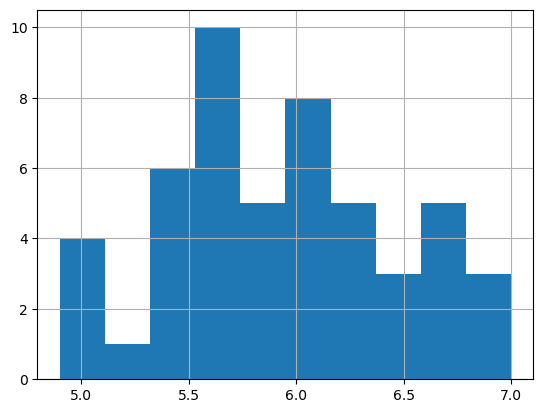

In [90]:
versicolor_sepal_length.hist()

<AxesSubplot:>

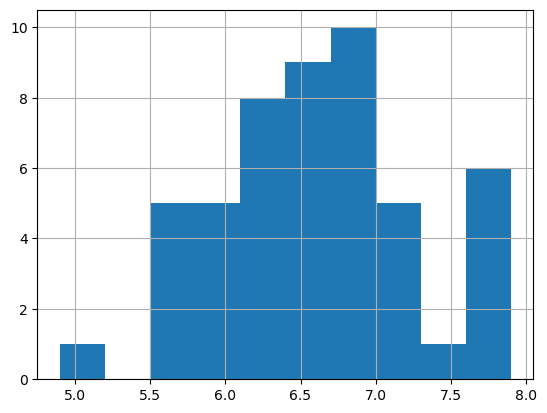

In [91]:
virginica_sepal_length.hist()

<AxesSubplot:>

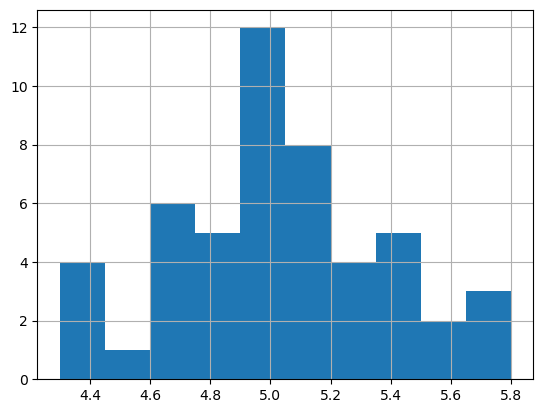

In [92]:
setosa_sepal_length.hist()

<AxesSubplot:>

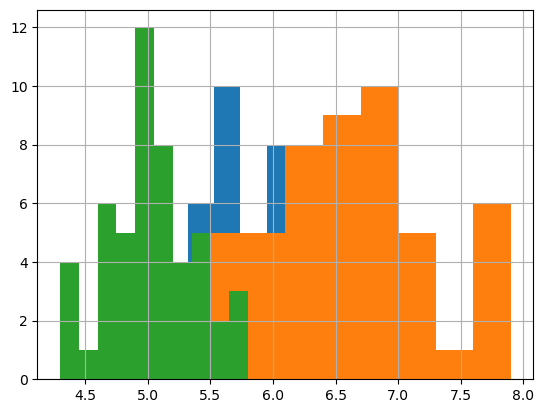

In [93]:
versicolor_sepal_length.hist()
virginica_sepal_length.hist()
setosa_sepal_length.hist()

## State hypotheses

$H_0$: For the mean of sepal_length - all species are equal <br>
$H_a$: For the mean of sepal_length - all species are  not equal

In [ ]:
#significance level

𝜶 = .05

In [104]:
# Independent samples: YES!

# 30 observations (Yes mosty normal)
print(len(versicolor_sepal_length))
print(len(virginica_sepal_length))
print(len(setosa_sepal_length))

50
50
50


Test for equal variance: Levene's Test

$H_0$: population variance of sepal length across all 3 species are equal<br>
$H_a$: population variance of sepal length is different amoong at least 2 of the species

In [105]:
stats.levene(versicolor_sepal_length,virginica_sepal_length,setosa_sepal_length)

LeveneResult(statistic=6.352720020482689, pvalue=0.0022585277836218586)

The p-value is < 0.05, therefore the variances of at least 2 of the groups are significantly different. In this case it would not be recommended to run an ANOVA because assumptions are violated.<br>
However, we will do it here to see what happens.<br>
In practice we would resort to a non-parametric verison our test, which in the case of ANOVA, would be a Kruskal-Wallis Test

In [102]:
# Equal Variance
print(versicolor_sepal_length.var())
print(virginica_sepal_length.var())
print(setosa_sepal_length.var())

0.2664326530612246
0.40434285714285706
0.12424897959183666


In [97]:
f, p = stats.f_oneway(versicolor_sepal_length, virginica_sepal_length, setosa_sepal_length)
f, p


(119.26450218450472, 1.6696691907693648e-31)

In [107]:
stats.kruskal(versicolor_sepal_length, virginica_sepal_length, setosa_sepal_length)


KruskalResult(statistic=96.93743600064833, pvalue=8.91873433246198e-22)

Because variances were not equal, we would go with the results of the Kruskal Wallis Test.<br>
We still achieved significance here.
Our takeaway is that there appears to be significant difference on sepal length across at least 2 of the groups

In [108]:
versicolor_sepal_length.mean()

5.936

In [109]:
virginica_sepal_length.mean()

6.587999999999998

In [110]:
setosa_sepal_length.mean()

5.005999999999999

In [116]:
stats.ttest_ind(versicolor_sepal_length,virginica_sepal_length, equal_var = False)

Ttest_indResult(statistic=-5.629165259719801, pvalue=1.8661443873771226e-07)

In [115]:
stats.ttest_ind(versicolor_sepal_length,setosa_sepal_length, equal_var = False)

Ttest_indResult(statistic=10.52098626754911, pvalue=3.746742613983842e-17)

In comparing each group combination, we can see there is a significant difference in the sepal length of each species

In [100]:
if p < 𝜶:
    print("We reject H₀")
else:
    print("We fail to reject H₀")


We reject H₀


In [117]:
import seaborn as sns
df = sns.load_dataset('mpg')
df.origin.value_counts()


usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [118]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [123]:
df.isna().sum()
# drop the nulls in horsepower
df = df[~df.horsepower.isna()]
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [124]:
df.origin.value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

Is the horsepower of vehicles different across the distinct origins of the vehicles?

$H_0$: mean_horsepower_USA = mean_horsepower_japan = mean_horsepower_europe<br>
$H_a$: mean horsepowers from at least 2 countries are significantly different.

Assumptions
1. At least 30 observations: met (see value counts above)
2. Equal population variance across all 3 groups 
3. Groups are independent of each other


<AxesSubplot:>

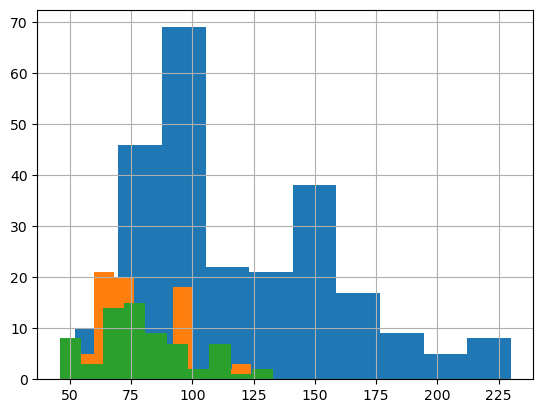

In [128]:
# let's look at the values of each of these and the histograms

df[df.origin == 'usa'].horsepower.hist()
df[df.origin == 'japan'].horsepower.hist()
df[df.origin == 'europe'].horsepower.hist()


In [131]:
# cerating a series of horsepower for each country
usa = df[df.origin == 'usa'].horsepower
japan = df[df.origin == 'japan'].horsepower
europe = df[df.origin == 'europe'].horsepower

In [132]:
# validate the variance assumption
stats.levene(usa,japan,europe)

LeveneResult(statistic=26.526632103545772, pvalue=1.5863075873913356e-11)

With a low p-value, we can assume the variances of the countries horsepower is significantly different, across at least 2 of the countries.<br>
With this information we should not use the ANOVA test, but instead use the Kruskal-Wallis.

In [135]:
t, p =stats.kruskal(usa,japan,europe)

p

1.1759521262123952e-23

With a p-value < .05 (alpha) , we can say there exists a significant difference between the horsepower of vehicles in at 2 of the countries. But which 2?

Compare 2 groups usa and japan

$H_0$: hp_usa == hp_japan<br>
$H_a$: hp_usa ≠ hp_japan



In [146]:
# compare 2 groups to see if there is significance

t, p = stats.ttest_ind(usa,japan,equal_var = False)

if p < .05:
    print(f'There is a significant difference between the hp of vehicles in the USA vs Japan (p-value {p})')
else:   
    print(f'We fail to find a significant difference (p-value {p})')

There is a significant difference between the hp of vehicles in the USA vs Japan (p-value 1.5146320352820458e-27)


In [145]:
# compare 2 groups to see if there is significance

t, p = stats.ttest_ind(usa,europe,equal_var = False)

if p < .05:
    print(f'There is a significant difference between the hp of vehicles in the USA vs Europe (p-value {p})')
else:   
    print(f'We fail to find a significant difference (p-value {p})')

There is a significant difference between the hp of vehicles in the USA vs Europe (p-value 2.1065705369888018e-22)


In [144]:
# compare 2 groups to see if there is significance

t, p = stats.ttest_ind(europe,japan,equal_var = False)

if p < .05:
    print('There is a significant difference between the hp of vehicles in the Europe vs Japan')
else:   
    print(f'We fail to find a significant difference (p-value {p})')

We fail to find a significant difference (p-value 0.8193616065509621)
